In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загрузка данных
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

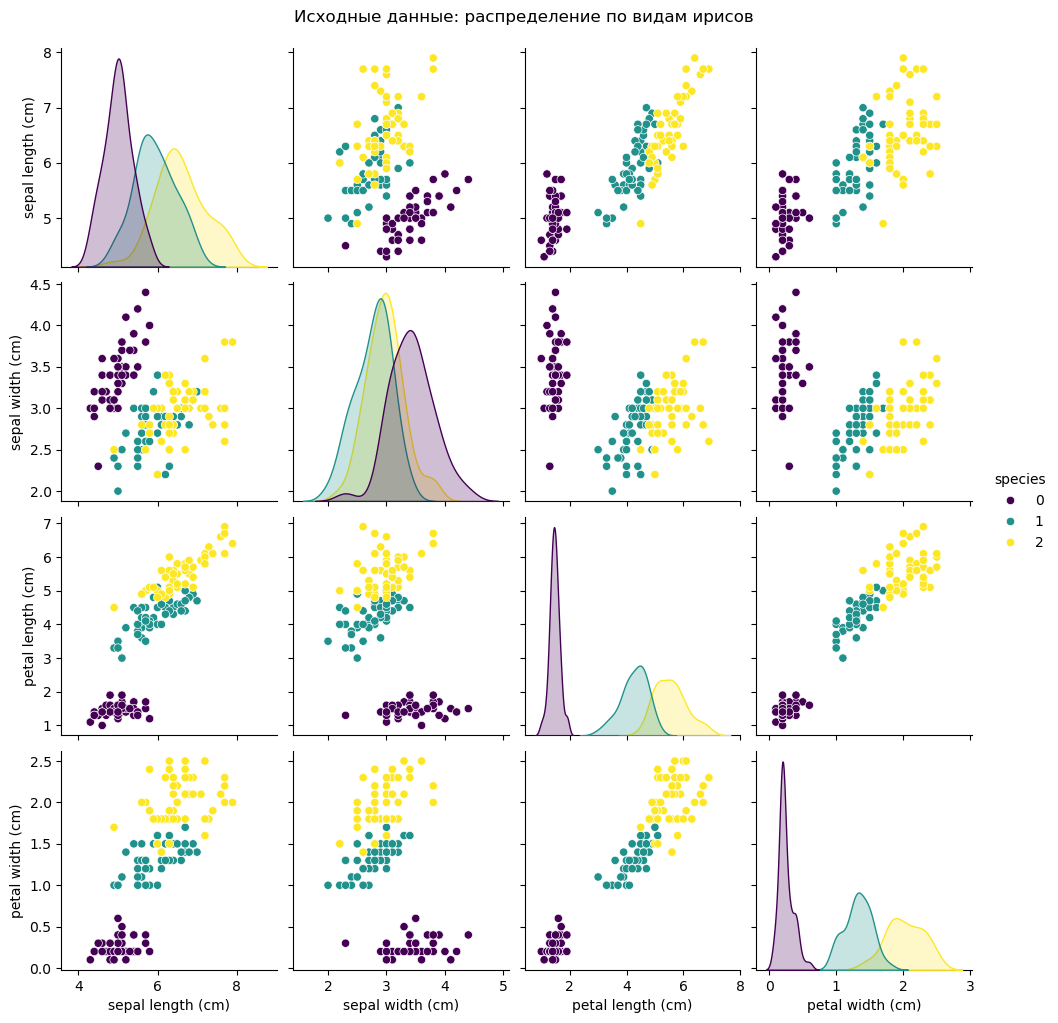

In [4]:
# Визуализация исходных данных
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Исходные данные: распределение по видам ирисов', y=1.02)
plt.show()

In [5]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df.iloc[:, :4])

In [6]:
# Функция для визуализации кластеров
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('Feature 1 (стандартизировано)')
    plt.ylabel('Feature 2 (стандартизировано)')
    plt.show()

# K-Means

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
iris_df['kmeans_cluster'] = kmeans_labels

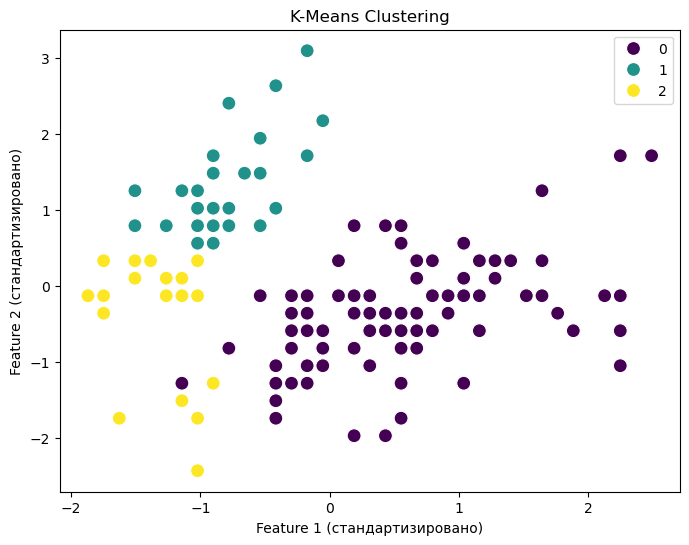

In [8]:
# Визуализация K-Means
plot_clusters(X_scaled, kmeans_labels, 'K-Means Clustering')

In [9]:
# Оценка K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

K-Means Silhouette Score: 0.48


# DBSCAN

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
iris_df['dbscan_cluster'] = dbscan_labels

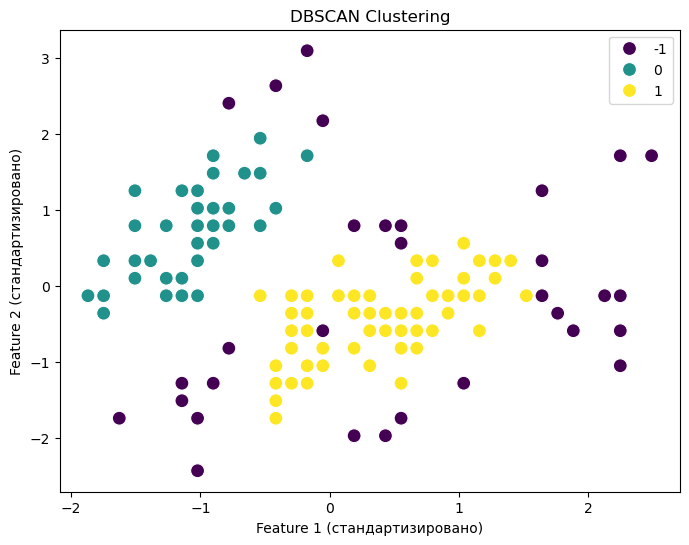

In [11]:
# Визуализация DBSCAN
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')

In [14]:
# Оценка DBSCAN
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")

DBSCAN Silhouette Score: 0.36


# Agglomerative Clustering

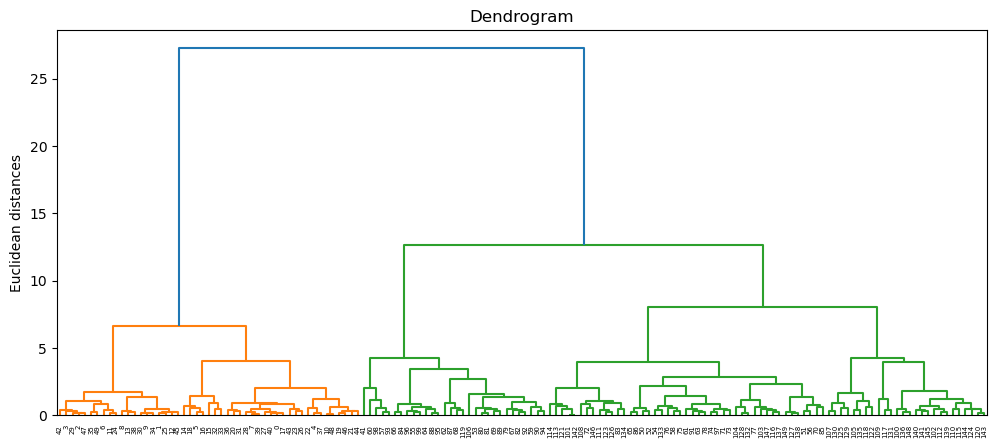

In [24]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
iris_df['agglo_cluster'] = agglo_labels

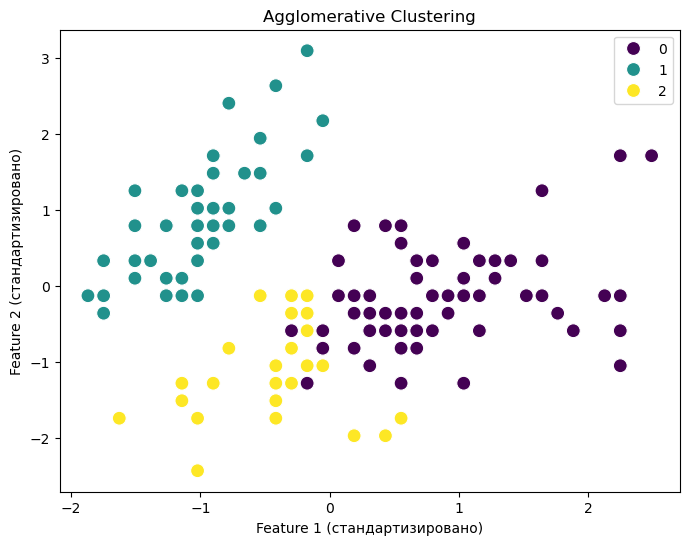

In [21]:
# Визуализация Agglomerative Clustering
plot_clusters(X_scaled, agglo_labels, 'Agglomerative Clustering')

In [17]:
# Оценка Agglomerative Clustering
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.2f}")

Agglomerative Clustering Silhouette Score: 0.45


# Сравнение моделей

In [18]:
# Сравнение результатов
print("\nСравнение моделей:")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette if 'dbscan_silhouette' in locals() else 'N/A'}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.2f}")


Сравнение моделей:
K-Means Silhouette Score: 0.48
DBSCAN Silhouette Score: 0.35651648142700726
Agglomerative Clustering Silhouette Score: 0.45


# Вывод


In [22]:

if kmeans_silhouette > agglo_silhouette:
    print("K-Means лучше всего подошел для кластеризации данных.")
else:
    print("Agglomerative Clustering лучше всего подошел для кластеризации данных.")
if 'dbscan_silhouette' in locals():
    print("DBSCAN показал результаты, но, возможно, требует настройки параметров.")
else:
    print("DBSCAN не смог разделить данные на несколько кластеров.")

K-Means лучше всего подошел для кластеризации данных.
DBSCAN показал результаты, но, возможно, требует настройки параметров.
